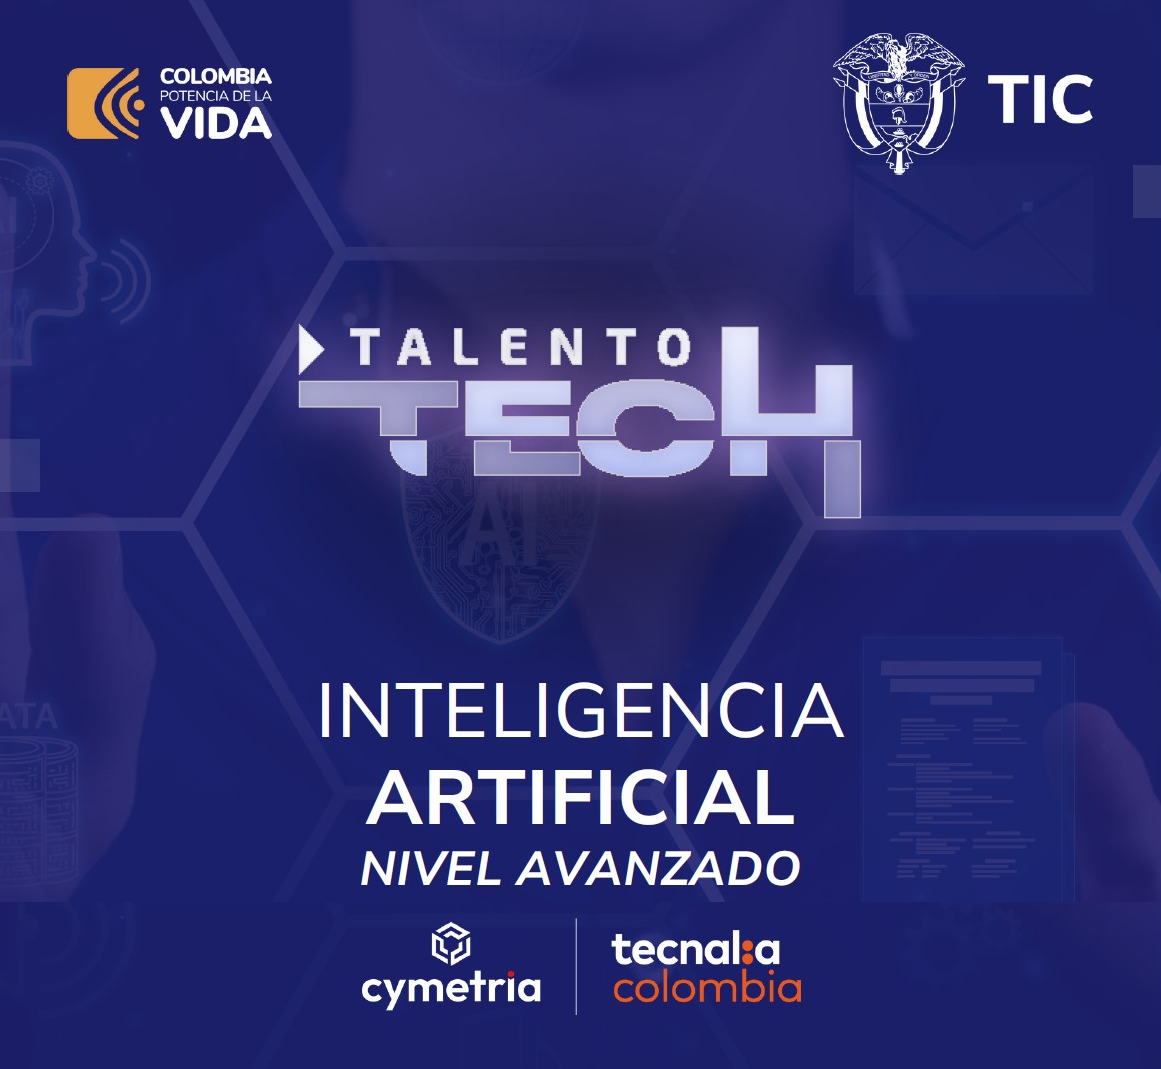

# <font size="50" color="lighblue">**Capítulo 6.**</font>

<font size="6" color="lighblue">**Machine Learning  - Aprendizaje NO Supervizado**</font>

<font size="3" color="lighblue">**Curso de IA**</font>

*Objetivos*  

- Ser capaz de aplicar las técnicas de aprendizaje automático necesarias según el plan de análisis establecido.

- Ser capaz de aplicar diversas técnicas de `aprendizaje no supervisado` para la `compresión de datos` reduciendo datos de alta dimensión a baja dimensión y visualización de datos reduciendo dimensiones.

- Ser capaz de resolver problemas aplicando diversas `técnicas de clustering` para la segmentación temática.
-
Ser capaz de realizar `descomposición matricial` y análisis y aplicaciones de componentes principales.

*Contenido*

- Unidad 1. Algoritmos de aprendizaje automático no supervisado
- Unidad 2. Agrupación no Jerárquica
- Unidad 3. Agrupación jerárquica
- Unidad 4. Modelo de factores lineales para la reducción de dimensionalidad
- Unidad 5. Métodos avanzados de agrupación y reducción de dimensionalidad


## <font size="8" color="lighblue"> Unidad 5. Métodos avanzados de agrupación y reducción de dimensionalidad</font>

###  <font size="7" >5.1. Distribución Normal Multivariada</font>

<font size="5" color="lighblue"> Vectores Aleatorios </font>

- Sean $X_1, X_2, \dots , X_p$ un conjunto finito de  $p$ `variables aleatorias` reales, entonces el vector $\boldsymbol{X} \in \mathbb{R}^p$ cuyas componentes son las anteriores variables unidimensionales se llama `vector aleatorio`

</br>

- En símbolos $\boldsymbol{X} = [X_1, X_2, \dots , X_p]$

</br>

- Usualmente todas las variables son de un `mismo tipo`: o todas discretas o todas contínuas; aunque es posible tener mezcla de ambas.

</br>

- `Ejemplo:` Se inspeccionan las unidades producidas por una línea de ensamble, y se clasifica cada una como `aceptable`, `inferior` o `rechazada`. Suponga que se selecciona de forma independiente y aleatoria `10` unidades. Sean $X_1,  X_2, X_3$ el número de unidades clasificadas en cada una de las 3 categorías, entonces el vector aleatorio:

  $$\boldsymbol{X} = [X_1,  X_2, X_3], \text{ donde } X_1 + X_2 + X_3 = 10$$

 $\boldsymbol{X}$ es conocido como un vector `multinomial`.

</br>

- Si $A$ es un subconjunto de $\mathbb{R}^p$, a la función $f_X(A) = P(\boldsymbol{X} \in A)$ se le llama la `distribución de probabilidad` del vector aleatorio $\boldsymbol{X}$.

<font size="5" color="lighblue"> Vector Normal Multivariado</font>

- Sea $\boldsymbol{X} = [X_1, X_2, \dots , X_p]$ un vector alatorio para el que `toda combinación lineal` de sus componentes se distribye normal univariado. Es decir:

  $$\sum\limits_{i=1}^pa_iX_i \sim \mathcal{N}(\mu, \sigma^2), \text{ para toda elección de } a_1, a_2, \dots, a_p$$

  entonces se dice que $\boldsymbol{X}$ es un vector `Normal Multivariado`.

</br>

- El vector definido como $\mu = [\mathbb{E}(X_1), \mathbb{E}(X_2), \ldots,
 \mathbb{E}(X_p)] = [\mu_1, \mu_2, \ldots, \mu_p]$ se conoce como `vector de medias`.

</br>

- Anteriormente se definió la matriz de `varianzas y convarianzas` como:

  $$ \Sigma = \begin{bmatrix} \sigma_{1}^2& \sigma_{12} & \cdots & \sigma_{1p}\\ \sigma_{21} & \sigma_{2}^2& \cdots & \sigma_{2p} \\ \vdots & \vdots & \ddots  & \vdots \\ \sigma_{p1} & \sigma_{p2} & \cdots  & \sigma_{p}^2  \end{bmatrix}$$


</br>

- La `función de densidad` para un vector `Normal Multivariado` está dada por:

  $$f_{X}(\boldsymbol{X})=\frac{1}{(2\pi)^{p/2}\mid \Sigma\mid^{1/2}}\exp\Bigl\{-{\frac12}(\boldsymbol{X}-{\mu})'\,{\Sigma}^{-1}(\boldsymbol{X}-{\mu})\Bigr\}$$

</br>

- Cuando $p = 2$ se obtiene un caso particular llamado `Distribución Normal Bivariada`. A continuación se muestran los gráficos de la función de densidad para tres ejemplos de de esta distribución:

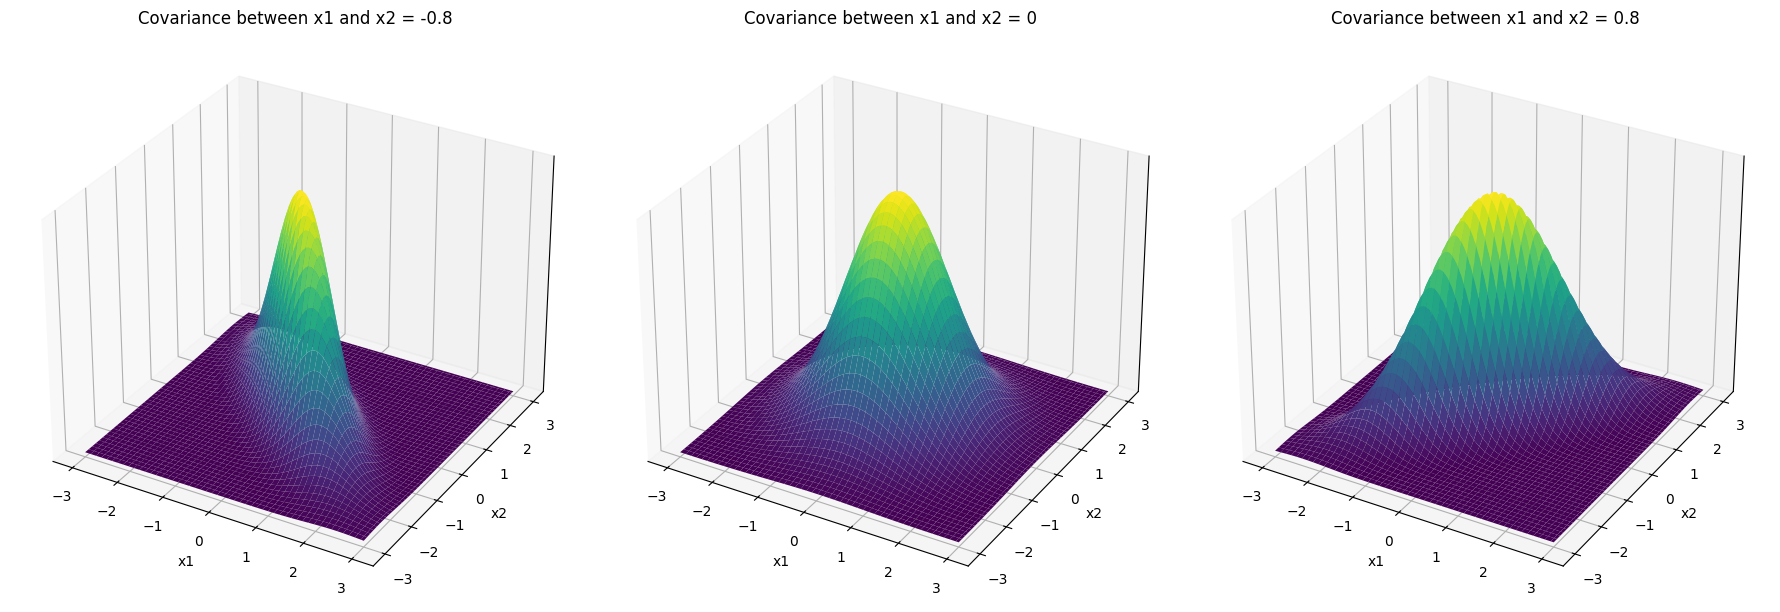

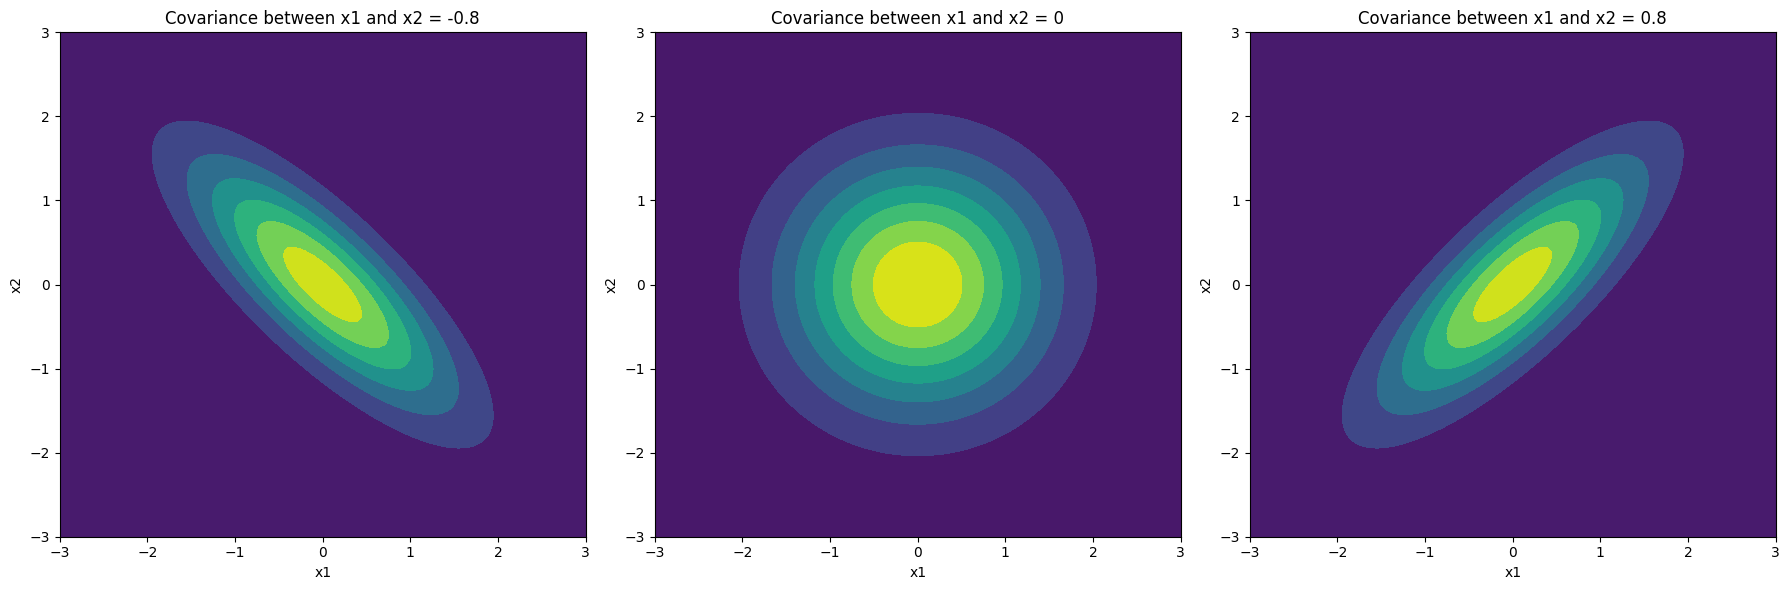

In [4]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns


# plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=18,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):

	# Initializing the covariance matrix
	cov = np.array([[1, val], [val, 1]])

	# Generating a Gaussian bivariate distribution
	# with given mean and covariance matrix
	distr = multivariate_normal(cov = cov, mean = mean,
								seed = random_seed)

	# Generating a meshgrid complacent with
	# the 3-sigma boundary
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]

	x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
	y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)

	# Generating the density function
	# for each point in the meshgrid
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

	# Plotting the density function values
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {val}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()


###  <font size="7" >5.2. Mezclas Gaussianas</font>

<font size="5" color="lighblue"> Modelo de Mezcla Gaussiana (GMM)</font>


- Un `Modelo de Mezcla Gaussiana` (GMM) es un modelo `probabilístico` que supone
que los datos se generaron a partir de una mezcla de varias `distribuciones normales multivaridas` cuyos parámetros son desconocidos.

</br>

- Todas las `instancias` generadas a partir de una única `distribución Gaussiana` forman un grupo que normalmente parece un `elipsoide`.

</br>

- Cada cluster puede tener diferentes `forma elipsoidal`, `tamaño`, `densidad` y `orientación` , tal como en la Figura anterior.


</br>

- Cuando se observa una instancia, se sabe que se `generó` a partir de una de las `distribuciones gaussianas`, pero no se sabe cuál de ellas y ni con cuáles `parámetros`.

</br>


- Existen múltiples `variantes` del GMM. En la variante más simple, implementada en la clase `GaussianMixture` de `sklearn`, se debe conocer de antemano el número $k$ de `distribuciones gaussianas`.

<font size="5" color="lighblue"> Proceso generativo</font>

Se supone que el conjunto de datos $\boldsymbol{X}$ se generó mediante el siguiente `proceso probabilístico`:

- Para cada instancia, se elige `aleatoriamente` un cluster entre $k$
posibles.

</br>

- La probabilidad de elegir el `cluster` $j$ se define por el
`peso` del grupo, $\phi^{(j)}$ .

</br>

- El `índice` del cluster elegido para la instancia $i$ se indica como $z^{(i)}
$ .

</br>

- Si la $i$-ésima instancia fue `asignada` al $j$-ésimo cluster (es decir $z^{(i)} = j$), entonces los valores de esta instancia, representados como $x^{(i)}$, son generados `aleatoriamente` a partir de una `Distribución Normal Multivariada` con vector de medias $\mu^{(j)}$ y matriz de covarianzas $\Sigma^{(j)}$.


</br>

- En símbolos: $x^{(i)} \sim \mathcal{N}_p(\mu^{(j)}, \Sigma^{(j)})$. Lo cual se lee como:

 $\color{red}{{x^{(i)} \text{ se distribuye Normal Multivariada de dimension } p, \text{vector de medias } \mu^{(j)} \text{ y  matriz de covarianzas }  \Sigma^{(j)}}}$


</br>

- Todo el proceso se resume en la siguiente figura:


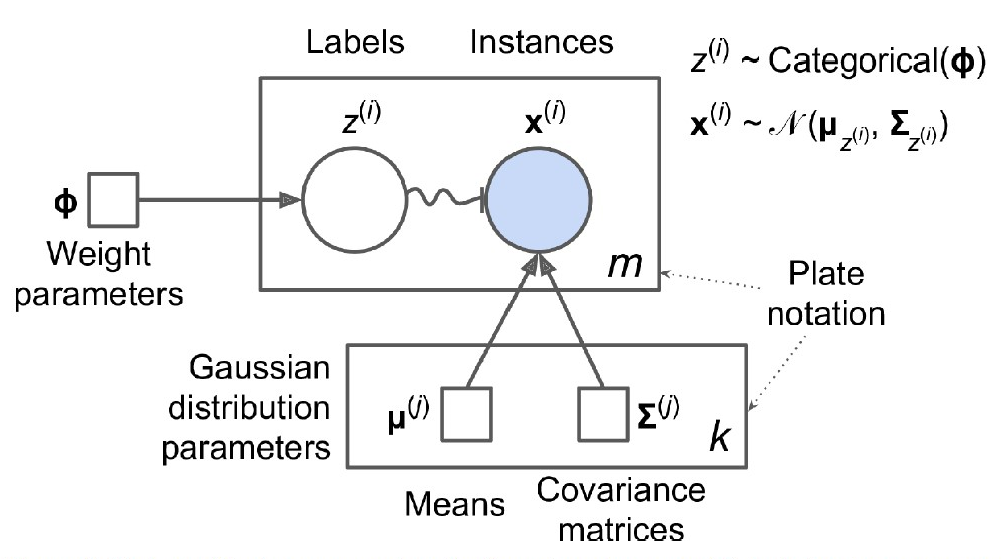

<font size="5" color="lighblue"> Proceso de entrenamiento y el algoritmo EM</font>

- Una vez elegido el número de clusters $k$ solo queda utilizar los datos para estimar los `pesos`  $\phi^{(1)}, \phi^{(2)}, \ldots , \phi^{(k)}$; los vectores de `medias` $\mu^{(1)}, \mu^{(2)}, \ldots , \mu^{(k)}$ y las matrices de `covarianzas` $\Sigma^{(1)}, \Sigma^{(2)}, \ldots , \Sigma^{(k)}$.

</br>

- En `sklearn` estos parámetros desconocidos se obtienen mediante un proceso de enterenamiento conocido como el `algoritmo EM` por sus siglas en inglés (`Expéctation-Maximization`) el cual tiene muchas `similitudes` con el algoritmo `K-Means`.

</br>

- El algoritmo EM También inicializa los `parámetros` del clúster de forma `aleatoria`, luego repite dos pasos hasta la `convergencia`:

 - `Primero:` se asignan instancias a los clústeres (esto se denomina paso de `expectativa`)

 - `Segundo:` Se maximiza la función de `log-verosimilitud`:

   $L(\Theta|\boldsymbol{X}) = \sum\limits_{i=1}^m \phi^{(z^{(i)})}\log\left(f_{X}(\boldsymbol{x}^{(i)})\right)$

   Siendo $\Theta$ el vector que contiene `todos` losn parámetros asociados a los `vectores de medias` y las `martrices de covarianzas`.

- En el contexto de la `clusterización`, se puede pensar en el `EM` como una
`generalización` del K-Means que no solo encuentra los `centroides` de los grupos ($\mu^{(j)}$'s), sino también su `tamaño`, `forma` y `orientación` ($\Sigma^{(j)}$'s), así como sus `pesos relativos` ($\phi^{(j)}$'s)

</br>

- Sin embargo, `a diferencia del K-Means`, EM utiliza asignaciones de grupos `suaves` o difusas, no asignaciones `duras` o excluyentes.

<font size="5" color="lighblue"> Matrices de Covarianzas</font>

Se pueden imponer restricciones a las matrices de covarianza que busca el algoritmo configurando el hiperparámetro `covariance_type`:

* `"spherical"`: todos los clústeres deben ser esféricos, pero pueden tener diferentes diámetros (es decir, diferentes varianzas).

* `"diag"`: los clústeres pueden adoptar cualquier forma elipsoidal de cualquier tamaño, pero los ejes del elipsoide deben ser paralelos a los ejes cartesianos (es decir, las matrices de covarianza deben ser diagonales).

* `"tied"`: todos los clústeres deben tener la misma forma, que puede ser cualquier elipsoide (es decir, todos comparten la misma matriz de covarianza).

* `"full"` (predeterminado): sin restricciones, todos los clústeres pueden adoptar cualquier forma elipsoidal de cualquier tamaño.

<font size="5" color="lighblue"> Selección del número de clusters</font>

No podemos utilizar la `SSE` ni la puntuación de `silueta` porque ambas suponen que los grupos son `esféricos`. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico como el `Criterio de Información Bayesiano` (BIC) o el `Criterio de Información de Akaike` (AIC):

- ${BIC} = {\log(m)p - 2\log({\hat L})}$

- ${AIC} = 2p - 2\log(\hat L)$

* $m$ es el número de `instancias`.

* $p$ es el número de `parámetros` aprendidos por el modelo.

* $\hat L$ es el valor maximizado de la `función de verosimilitud` del modelo. Esta es la probabilidad condicional de los datos observados $\mathbf{X}$, dado el modelo y sus `parámetros optimizados`.

* Los  modelos con `menor` $AIC$ O $BIC$ son generalmente preferidos.

Tanto el `BIC` como el `AIC` penalizan a los modelos que tienen más parámetros para aprender (por ejemplo, más grupos) y recompensan a los modelos que se ajustan bien a los datos (es decir, modelos que dan una alta verosimilitud a los datos observados).

<font size="5" color="lighblue"> Ventajas y desventajas</font>

- `Ventajas:`

  - `Velocidad`: Es el algoritmo más rápido para aprender modelos mixtos

  - `Agnóstico`: Como este algoritmo maximiza solo la probabilidad, no sesgará las medias hacia cero ni los tamaños de los clústeres.

- `Desventajas`

  - `Singularidades`: Cuando no se dispone de `suficientes puntos` por mezcla, resulta difícil estimar las matrices de covarianza, y se sabe que el algoritmo diverge y encuentra soluciones con una `probabilidad infinita` a menos que se regularicen las covarianzas artificialmente.

  - `Número de componentes`: Hay que proporcionarle el número $k$ de clústers o componentes a ajustar.

  - Lamentablemente, al igual que `K-Means`, eL `EM` puede terminar convergiendo en `soluciones deficientes`, por lo que es necesario ejecutarlo `varias veces`, conservando solo la mejor solución. Por eso, se recomienda configurar `n_init` en al menos $10$. `Tenga cuidado`: de manera predeterminada, n_init está configurado en $1$.

<font size="5" color="lighblue">Complejidad computacional del algoritmo EM</font>  ($\mathcal{O}$)

- La complejidad computacional del entrenamiento de un modelo `GaussianMixture` depende de:
 * El número de `filas` $m$.

 * El número de `columnas` $n$.

 * El número de `clusters` $k$.

 * Las restricciones sobre las `matrices de covarianza`.

</br>

- Si `covariance_type` es **spherical** o **diag**, la complejidad es de orden $\mathcal{O}(kmn)$, asumiendo que los datos tienen una estructura de agrupamiento.

</br>

* Si `covariance_type` es **tied** o **full**, la complejidad es de orden $\mathcal{O}(kmn^2 + kn^3)$, la cual incrementa dramáticamente cuando hay un gran número de columnas.





#### <font size="10" color="lighblue"> EJERCICIO APLICATIVO</font>.

Aplicar a datos simulados

In [10]:
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore') 

n_samples = 500
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
component_1 = np.dot(np.random.randn(n_samples, 2), C)  # general
component_2 = 0.7 * np.random.randn(n_samples, 2) + np.array([-4, 1])  # spherical

X = np.concatenate([component_1, component_2])

La matriz de covarianzas para la primera componente o cluster es $C^tC$ como se muestra en el siguiente cálculo:

In [6]:
# np.random.randn(n_samples, 2).shape#
np.dot(C.transpose(), C)

array([[2.89, 0.68],
       [0.68, 0.17]])

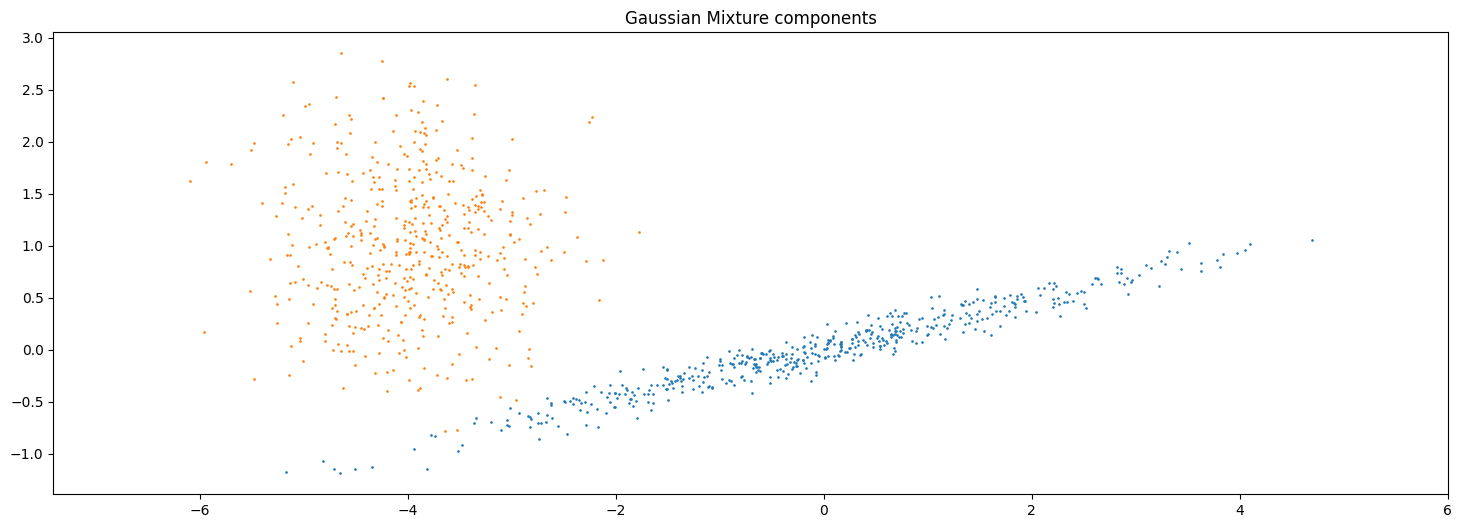

In [7]:
import matplotlib.pyplot as plt

plt.scatter(component_1[:, 0], component_1[:, 1], s=0.8)
plt.scatter(component_2[:, 0], component_2[:, 1], s=0.8)
plt.title("Gaussian Mixture components")
plt.axis("equal")
plt.show()


In [18]:
%%time
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 11),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score, cv = 30
)
grid_search.fit(X)

CPU times: total: 2min 13s
Wall time: 21.5 s


GridSearchCV(cv=30, estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 11)},
             scoring=<function gmm_bic_score at 0x00000291C1D93BA0>)

In [127]:
# grid_search.cv_results_

In [19]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score")

,Number of components,Type of covariance,BIC score
31,2,full,190.424184
32,3,full,211.923577
21,2,diag,227.265741
22,3,diag,232.725420
33,4,full,233.185355
11,2,tied,236.531530
23,4,diag,239.691341
12,3,tied,240.528113
14,5,tied,241.512741
13,4,tied,242.579716


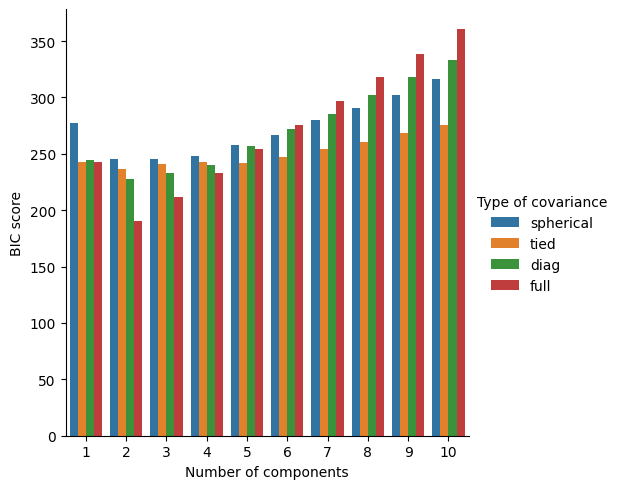

In [20]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

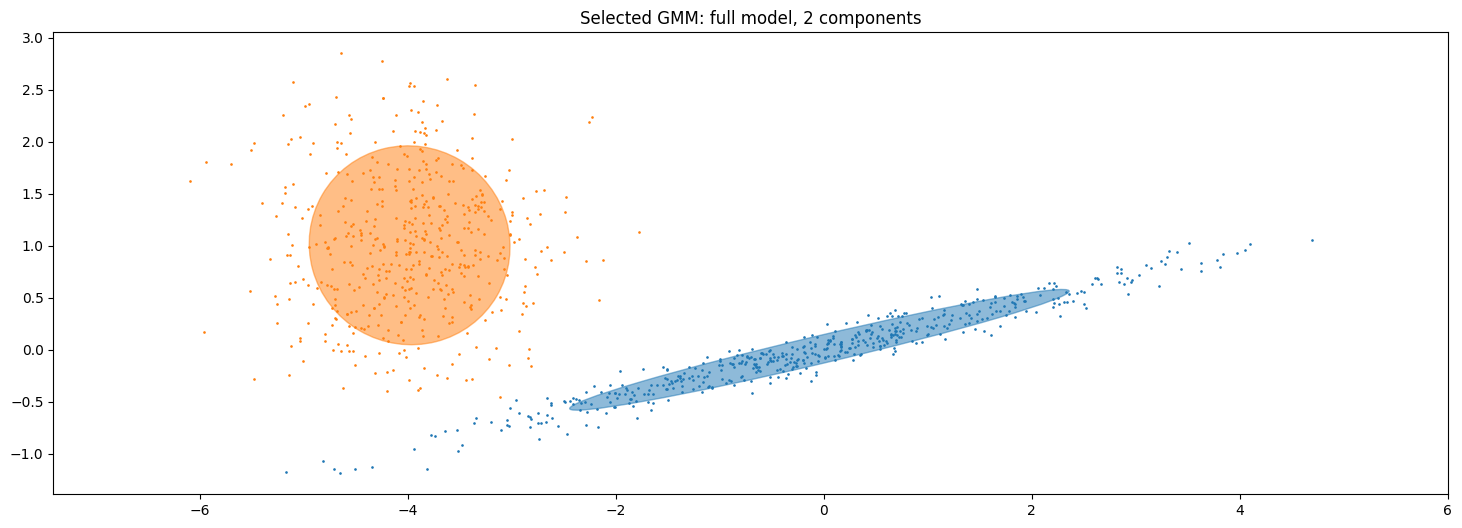

In [21]:
from matplotlib.patches import Ellipse
from scipy import linalg

color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components"
)
plt.axis("equal")
plt.show()

In [22]:
## Vectores de medias estimadas
np.round(grid_search.best_estimator_.means_, 2)

array([[-3.99,  1.  ],
       [-0.04, -0.  ]])

In [23]:
## Vectores de medias usados en la simulación:
np.array([[0, 0], [-4, 1]])

array([[ 0,  0],
       [-4,  1]])

In [24]:
## Matrices de covarianzas estimadas
np.round(grid_search.best_estimator_.covariances_, 2)

array([[[ 0.47, -0.01],
        [-0.01,  0.46]],

       [[ 2.89,  0.68],
        [ 0.68,  0.17]]])

Para el `componente_1` $\Sigma = C^tC$

In [25]:
## Matrices de covarianzas usadas en la simulación
print(np.dot(C.transpose(), C))
print()
print(0.7**2*np.array([[1, 0], [0, 1]]))

[[2.89 0.68]
 [0.68 0.17]]

[[0.49 0.  ]
 [0.   0.49]]


In [26]:
## Pesos estimados:
grid_search.best_estimator_.weights_ ## 50 - 50

array([0.49991337, 0.50008663])

In [27]:
## Estado de convergencia:
grid_search.best_estimator_.converged_ ## SI

True

In [28]:
## Número de iteraciones ejecutadas:
grid_search.best_estimator_.n_iter_ ## 5

5

In [34]:
## Generación de predicciones: Dura

grid_search.best_estimator_.predict(np.array([[-2, -1]]))

array([0], dtype=int64)

In [36]:
## Generación de predicciones: Suave

grid_search.best_estimator_.predict_proba(np.array([[-2, -1]]))

array([[0.99842674, 0.00157326]])

In [62]:
## Usando el modelo ganador para "simular" nuevos datos
np.random.seed(123)
X_new, y_new = grid_search.best_estimator_.sample(6)

print(X_new)
print(y_new)

[[-3.67286734  0.24086115]
 [-4.8785535   1.83935683]
 [-4.19365099  1.08424261]
 [-3.19407979  2.08425991]
 [ 2.73180634  0.54267296]
 [ 0.68088762  0.33007824]]
[0 0 0 0 1 1]


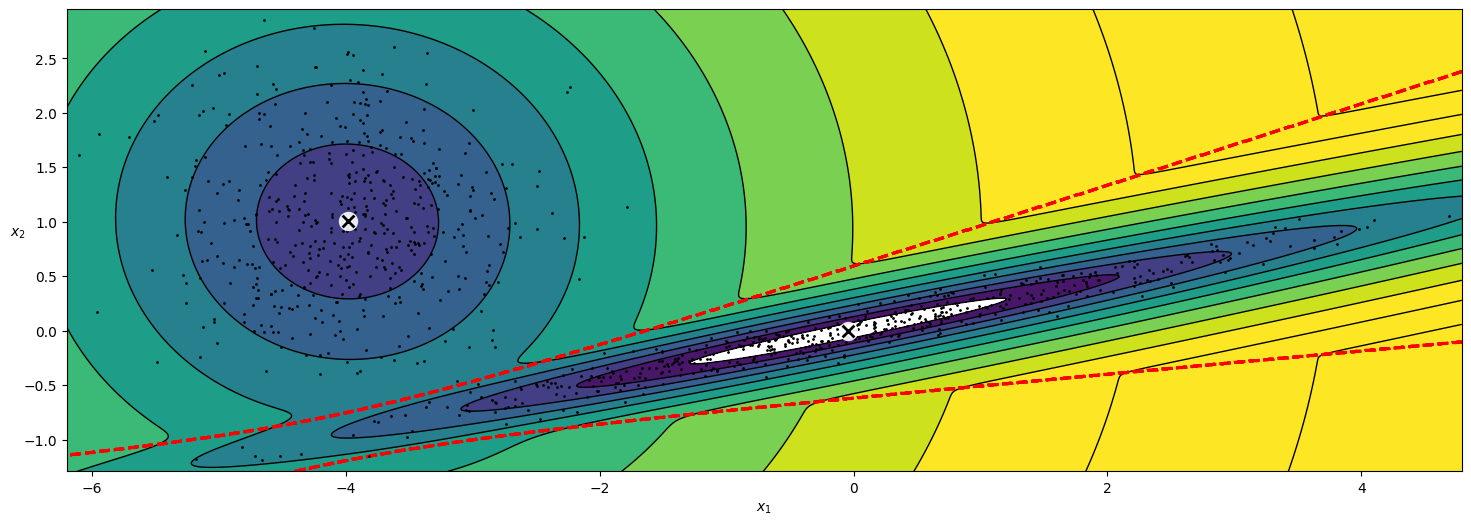

In [63]:
## Dibujando la frontera de decisión
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# plt.figure(figsize=(8, 8))

plot_gaussian_mixture(grid_search.best_estimator_, X)

# save_fig("gaussian_mixtures_plot")
plt.show()

<font size="5" >Detección de anomalías mediante mezclas gaussianas</font>

Las mezclas gaussianas se pueden utilizar para la `detección de anomalías`: las instancias ubicadas en `regiones de baja densidad` se pueden considerar anomalías. Debe definir qué umbral de densidad desea utilizar. Por ejemplo, en una empresa de fabricación que intenta detectar productos defectuosos, la proporción de productos defectuosos suele ser bien conocida. Digamos que es igual al `2%`, entonces puede establecer el umbral de densidad como el valor que da como resultado que el 2 % de las instancias se encuentren en áreas por debajo de esa densidad de umbral:



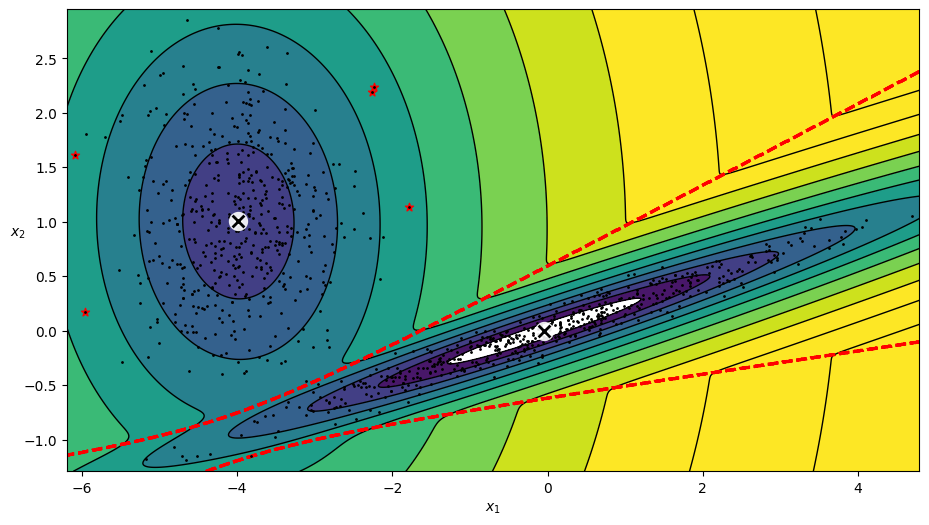

In [73]:
## Detección de anomalías usando GMM:

densities = grid_search.best_estimator_.score_samples(X)
density_threshold = np.percentile(densities, 0.5)
anomalies = X[densities < density_threshold]

plt.figure(figsize=(11, 6))

plot_gaussian_mixture(grid_search.best_estimator_, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
# plt.ylim(top=5.1)

# save_fig("mixture_anomaly_detection_plot")
plt.show()

In [75]:
anomalies

array([[-1.78031766,  1.13264975],
       [-2.23154223,  2.23894497],
       [-5.96154196,  0.1681029 ],
       [-6.096229  ,  1.61665629],
       [-2.25809087,  2.18717867]])

###  <font size="7" >5.3. Reducción de dimensionalidad no lineal</font>

<font size="5" color="lighblue">¿Por qué considerar la reducción de dimensionalidad no lineal?</font>

* Muchos algoritmos de aprendizaje automático hacen `suposiciones` sobre la `separabilidad lineal` de los datos de entrada.

</br>

* Otros algoritmos asumen que la falta de `separabilidad lineal` perfecta se debe al `ruido`: `Adaline`, `regresión logística` y el `SVM` (estándar), por nombrar solo algunos.

</br>


* Si estamos tratando con `problemas no lineales`, los cuales podemos encontrar con bastante frecuencia en aplicaciones del `mundo real`, las técnicas de transformación lineal para la reducción de dimensionalidad, como `PCA`, pueden no ser la mejor opción.

</br>

* La biblioteca `scikit-learn` implementa una selección de técnicas avanzadas para la `reducción de dimensionalidad no lineal`. Estas técnicas también se denominan a menudo `manifold learning`(aprendizaje de variedades).

</br>


* Si bien los algoritmos de `aprendizaje de variedades` y `reducción de dimensionalidad no lineal` son muy poderosos, debemos tener en cuenta que estas técnicas son notoriamente `difíciles de usar` y, con elecciones de hiperparámetros no ideales, pueden causar más daño que beneficio.

<font size="5" color="lighblue">t-SNE: t-distributed stochastic neighbor embedding</font>

* Una técnica de reducción de dimensionalidad no lineal que vale la pena destacar es la `incrustación de vecinos estocásticos T-distribuidos` (t-SNE), ya que se utiliza con frecuencia en la literatura para visualizar conjuntos de datos de `alta dimensión` en `dos` o `tres` dimensiones.

</br>

* En pocas palabras, el `t-SNE` modela puntos de datos en función de sus `distancias por pares` en el espacio de variables de alta dimensión (original).

* Luego, encuentra una `distribución de probabilidad` de las distancias por pares en el nuevo espacio de `menor dimensión` que es cercana a la distribución de probabilidad de distancias por pares en el `espacio original`.

</br>

* En otras palabras, el `t-SNE` aprende a `incrustar` puntos de datos en un `espacio de menor dimensión` de modo que se `conserven` las distancias por pares en el espacio original.

<font size="5" color="lighblue">Algoritmo de aprendizaje para el t-SNE</font>

A continuación se resume, de manera conceptual y sin muchos detalles teóricos, el `algortimo` de aprendizaje para el método `t-SNE`

* (1) Tome como entradas los `datos originales` $\boldsymbol{X}$, la `tasa de aprendizaje` $\eta$ y el `número de iteraciones` $T$.

</br>

* (2) Adicionalmente se debe definir un hyperparámetro llamado perplejidad (`perplexity`), que puede interpretarse como una medida uniforme del `número efectivo de vecinos`. El rendimiento del `t-SNE` es bastante `robusto` a los cambios en la perplejidad y los valores típicos están entre $5$ y $50$.

</br>

* (3) `Inicialice aleatoriamente` los valores de las nuevas variables $\boldsymbol{Y} \sim \mathcal{N}_p(0, 10^{-4}\boldsymbol{I})$ en el `espacio comprimido` donde se quiere representar los datos.

</br>


* (4) Calcule $P_{ij}$ la `distribución de probabilidad` para las distancias pareadas en el `espacio original` de los datos asumiendo una `distribución Gausiana` o Normal y usando el parámetro de perplejidad. Encontrará un total de $\binom{m}{2}$ parejas, siendo $m$ el número de filas.

</br>


* (5) Calcule $Q_{ij}$ la `distribución de probabilidad` para las distancias pareadas en el `espacio comprimido` donde se quiere representar los datos,  asumiendo una `distribución t de Student` con un grado de libertad. De acá proviene la letra `t` en el nombre de la técnica.

</br>


* (6) Construya la `divergencia de Kullback-Leibler` como una medida de `discrepancia` entre $P_{ij}$ y $Q_{ij}$, mediante la siguiente expresión:

  $$KL(P||Q[\boldsymbol{Y}]) = \sum_i^m\sum_j^mP_{ij}\log\dfrac{P_{ij}}{Q_{ij}}$$


</br>


* (7) Utilice le `descenso del gradiente` con una tasa de aprendizaje $\eta$ para `minimizar` $KL(P||Q)$ respecto a $\boldsymbol{Y}$ con un máximo de $T$ iteraciones.

$$\boldsymbol{Y}^{(t + 1)}  = \boldsymbol{Y}^{(t)} + \eta\cdot \nabla KL(P||Q)|_{\boldsymbol{Y}^{(t)}}$$

</br>


`Nota:` Este algoritmo está implementado en la clase `TSNE` de `sklearn.manifold`.

<font size="5" color="lighblue"> Ventajas y desventajas del t-SNE</font>

- `Ventajas:`

    * Revelar la estructura en `muchas escalas` en un solo mapa.

    * Revelar datos que se encuentran en `múltiples` y diferentes `grupos` o variedades.

    * Reducir la tendencia a `agrupar` los puntos en el `centro`.


</br>


 - `Desventajas:`

    * El `t-SNE` es `costoso` desde el punto de vista `computacional` y puede llevar `varias horas` en conjuntos de datos de `millones` de muestras, mientras que el `PCA` finalizará en `segundos o minutos`.

    * El método t-SNE de `Barnes-Hut` está limitado a incrustaciones `bidimensionales` o `tridimensionales`.

    * El `algoritmo` es `estocástico` y varias corridas con `diferentes valores iniciales` pueden generar diferentes incrustaciones. Sin embargo, es perfectamente legítimo elegir la incrustación con `el menor error`.

    * Los `datos ruidosos` pueden provocar un `corto circuito` en el algoritmo, actuando en esencia como un `puente` entre regiones  que de otro modo estarían bien separadas.





#### <font size="10" color="lighblue"> EJERCICIO APLICATIVO</font>.

Visualizar clusters de dígitos

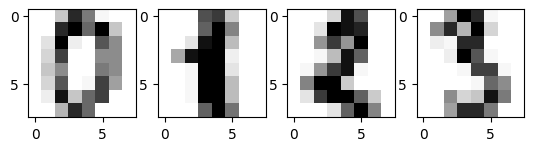

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

digits = load_digits()

fig, ax = plt.subplots(1, 4)

for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')

# plt.savefig('figures/05_12.png', dpi=300)
plt.show()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
y_digits = digits.target
X_digits = digits.data
pd.DataFrame(X_digits).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [20]:
%%time
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2,
            init='pca',
            random_state=123, n_jobs=-1)     # instanciando el modelo
X_digits_tsne = tsne.fit_transform(X_digits) # ajustando el modelo  y transformando los datos

CPU times: total: 9.78 s
Wall time: 8.66 s


In [21]:
X_digits_tsne#.shape

array([[ -3.045206 , -55.185295 ],
       [ 10.516361 ,  12.094709 ],
       [-14.1085205,  19.069214 ],
       ...,
       [ -5.9568334,  11.18515  ],
       [-21.247377 , -15.45419  ],
       [-14.1746025,   7.2935767]], dtype=float32)

In [33]:
y_digits[0]

0

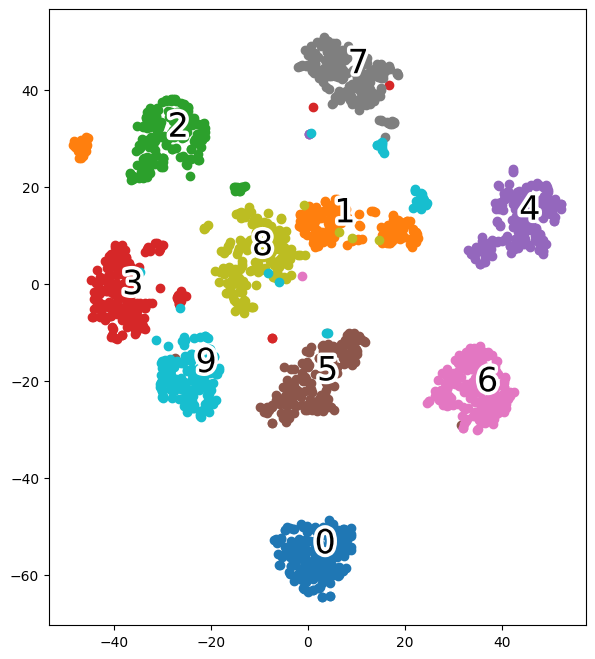

In [22]:
import matplotlib.patheffects as PathEffects
import numpy as np


def plot_projection(x, colors):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])

    for i in range(10):

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])

plot_projection(X_digits_tsne, y_digits)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

In [24]:
# Algunos atributos
print("divergencia de Kullback-Leibler: ", tsne.kl_divergence_)
print("Dimensión del espacio original:  ", tsne.n_features_in_)
print("Tasa de aprendizaje:             ", tsne.learning_rate_)
print("Número de iteraciones:           ", tsne.n_iter_)

divergencia de Kullback-Leibler:  0.7529399394989014
Dimensión del espacio original:   64
Tasa de aprendizaje:              50.0
Número de iteraciones:            999


In [ ]:
%%time
## En 3D
from sklearn.manifold import TSNE


tsne_3 = TSNE(n_components=3,
            init='pca',
            random_state=123, n_jobs=-1)     # instanciando el modelo
X_digits_tsne_3 = tsne_3.fit_transform(X_digits) 

CPU times: total: 25 s
Wall time: 24.3 s


In [ ]:
import plotly.express as px
fig = px.scatter_3d( x=X_digits_tsne_3[:,0], y = X_digits_tsne_3[:,1], z=X_digits_tsne_3[:,2],
              color = pd.Series(y_digits).astype("category"), width = 700)
fig.show()